#  Model performance depending on training data
In this section, I will test how the model performance depends on the training data. I want to discover which kind of biases we could find when training a model.

In [1]:
from test_utils.imports import *

#### Building the models

* We train 6 different models, each one with performances of specific song in the train set.
*

In [20]:
dataset_path = '../Databases/'
loader = SEGMENTS_LOADER(dataset_path)

# In filtered field we introduce the name of the songs we want in the train set:
# Lily, Mountain, Where, Train, Century, Hole
model_name = 'WhereDidYouSleepLastNight'
model_path = '../MODELS/cross-validation/SongWise_Test/'

train_audios, test_audios, train_segments, test_segments = loader.train_test_split_filtered_field(ex_2_id,
                                                                                   'Loaders/Raw_database.json',
                                                                                   filter_field =['Hole'],
                                                                                segments = None)
# Model without minor chords (Uncomment section for model trained with 20th Century Boy recordings)
# m = NewModel(
#         {'maj': ['I', 'III', 'V'], '5': ['I', 'V'], '1': ['I', 'V', 'III']},

#         {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
#          '5': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
#          '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})

# Model without power chords (Uncomment section for model trained with Lily Was Here, Mountain at my Gates,
# Runaway Train or Hole in my shoe recordings)
# m = NewModel(
#         {'maj': ['I', 'III', 'V'], 'min': ['I', 'IIIb', 'V'], '1': ['I', 'V', 'III']},

#         {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
#          'min': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
#          '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})

# Model with all the classes except major/minor thirds (Uncomment for models trained with Where did you sleep last night
# recordings

m = NewModel(
        {'maj': ['I', 'III', 'V'], 'min': ['I', 'IIIb', 'V'], '5': ['I', 'V'], '1': ['I', 'V', 'III']},

        {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         'min': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '5': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})

m.fit(train_segments)
# m.save_model(model_path  + model_name + '.pkl')

Memory(cachedir='../Cached_Segments/joblib')
Building Train set...

--->>>The train segments  loading took 0.01 s to compute.
Building test set ...

--->>>The test segments  loading took 0.03 s to compute.
Now training:  maj
Now training:  min
Now training:  1


In [21]:
# Training data stats
for i, k in enumerate(train_segments.kinds):
    if k == '+3' or k == '-3':
        train_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in train_segments.kinds]
train_segments = AnnotatedChromaSegments(
    train_segments.labels[is_defined],
    train_segments.pitches[is_defined],
    train_segments.kinds[is_defined],
    train_segments.chromas[is_defined],
    train_segments.uids[is_defined],
    train_segments.start_times[is_defined],
    train_segments.durations[is_defined])

print('Test set has {} chromas.'.format(train_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(train_segments.chromas[train_segments.kinds == k])))

Test set has 1275 chromas.
maj -> Num chromas: 330
min -> Num chromas: 150
1 -> Num chromas: 795
5 -> Num chromas: 0
+3 -> Num chromas: 0
-3 -> Num chromas: 0


In [13]:
# Test data stats
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Test set has 8175 chromas.
maj -> Num chromas: 1275
min -> Num chromas: 945
1 -> Num chromas: 5175
5 -> Num chromas: 780
+3 -> Num chromas: 0
-3 -> Num chromas: 0


## Visualize model

0


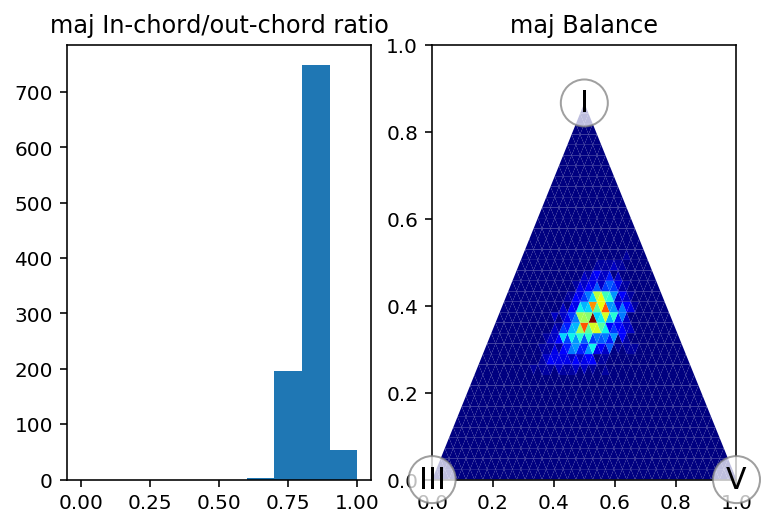

1


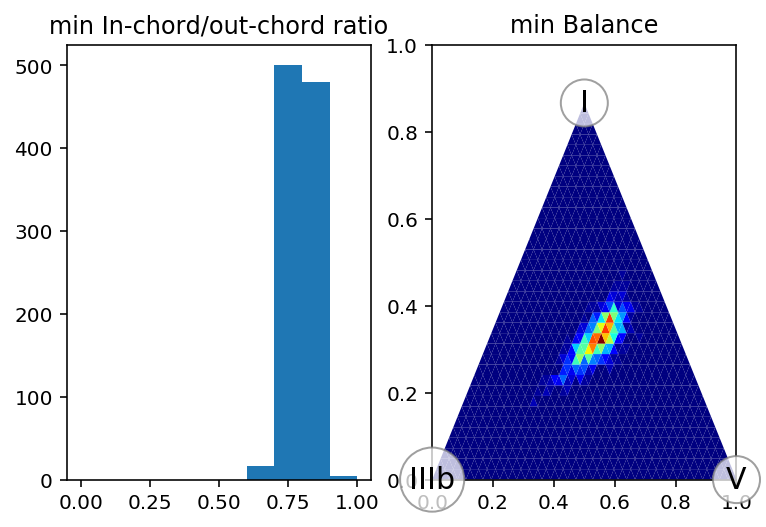

2


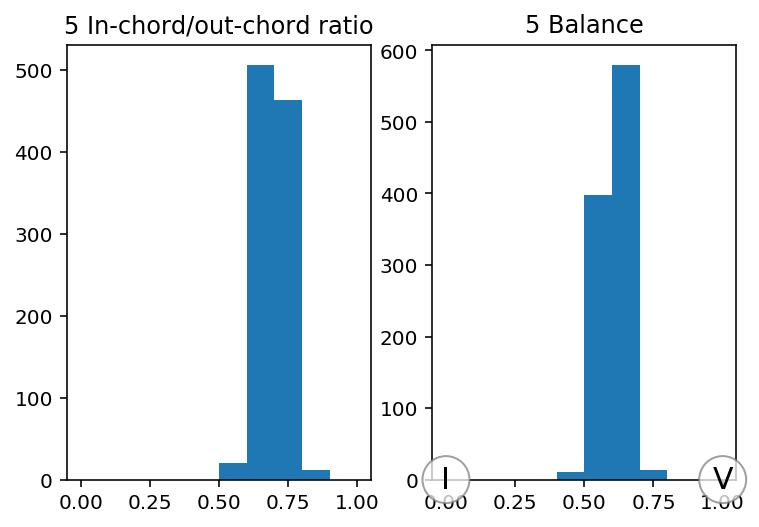

3


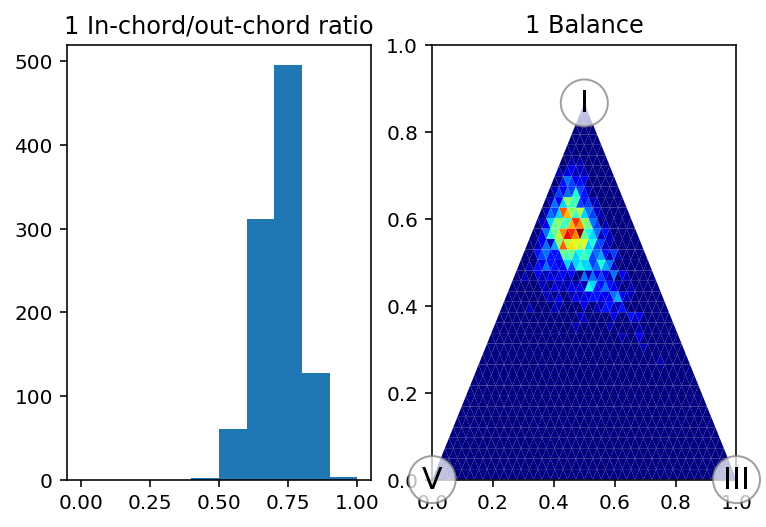

In [7]:
m = joblib.load(model_path + model_name + '.pkl')
for k in range(len(m.kinds)):
    print(k)
    visualize(m, k)

## Model performances and comparisons

In [8]:
m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

#### Overall accuracy

Accuracy: 0.8632


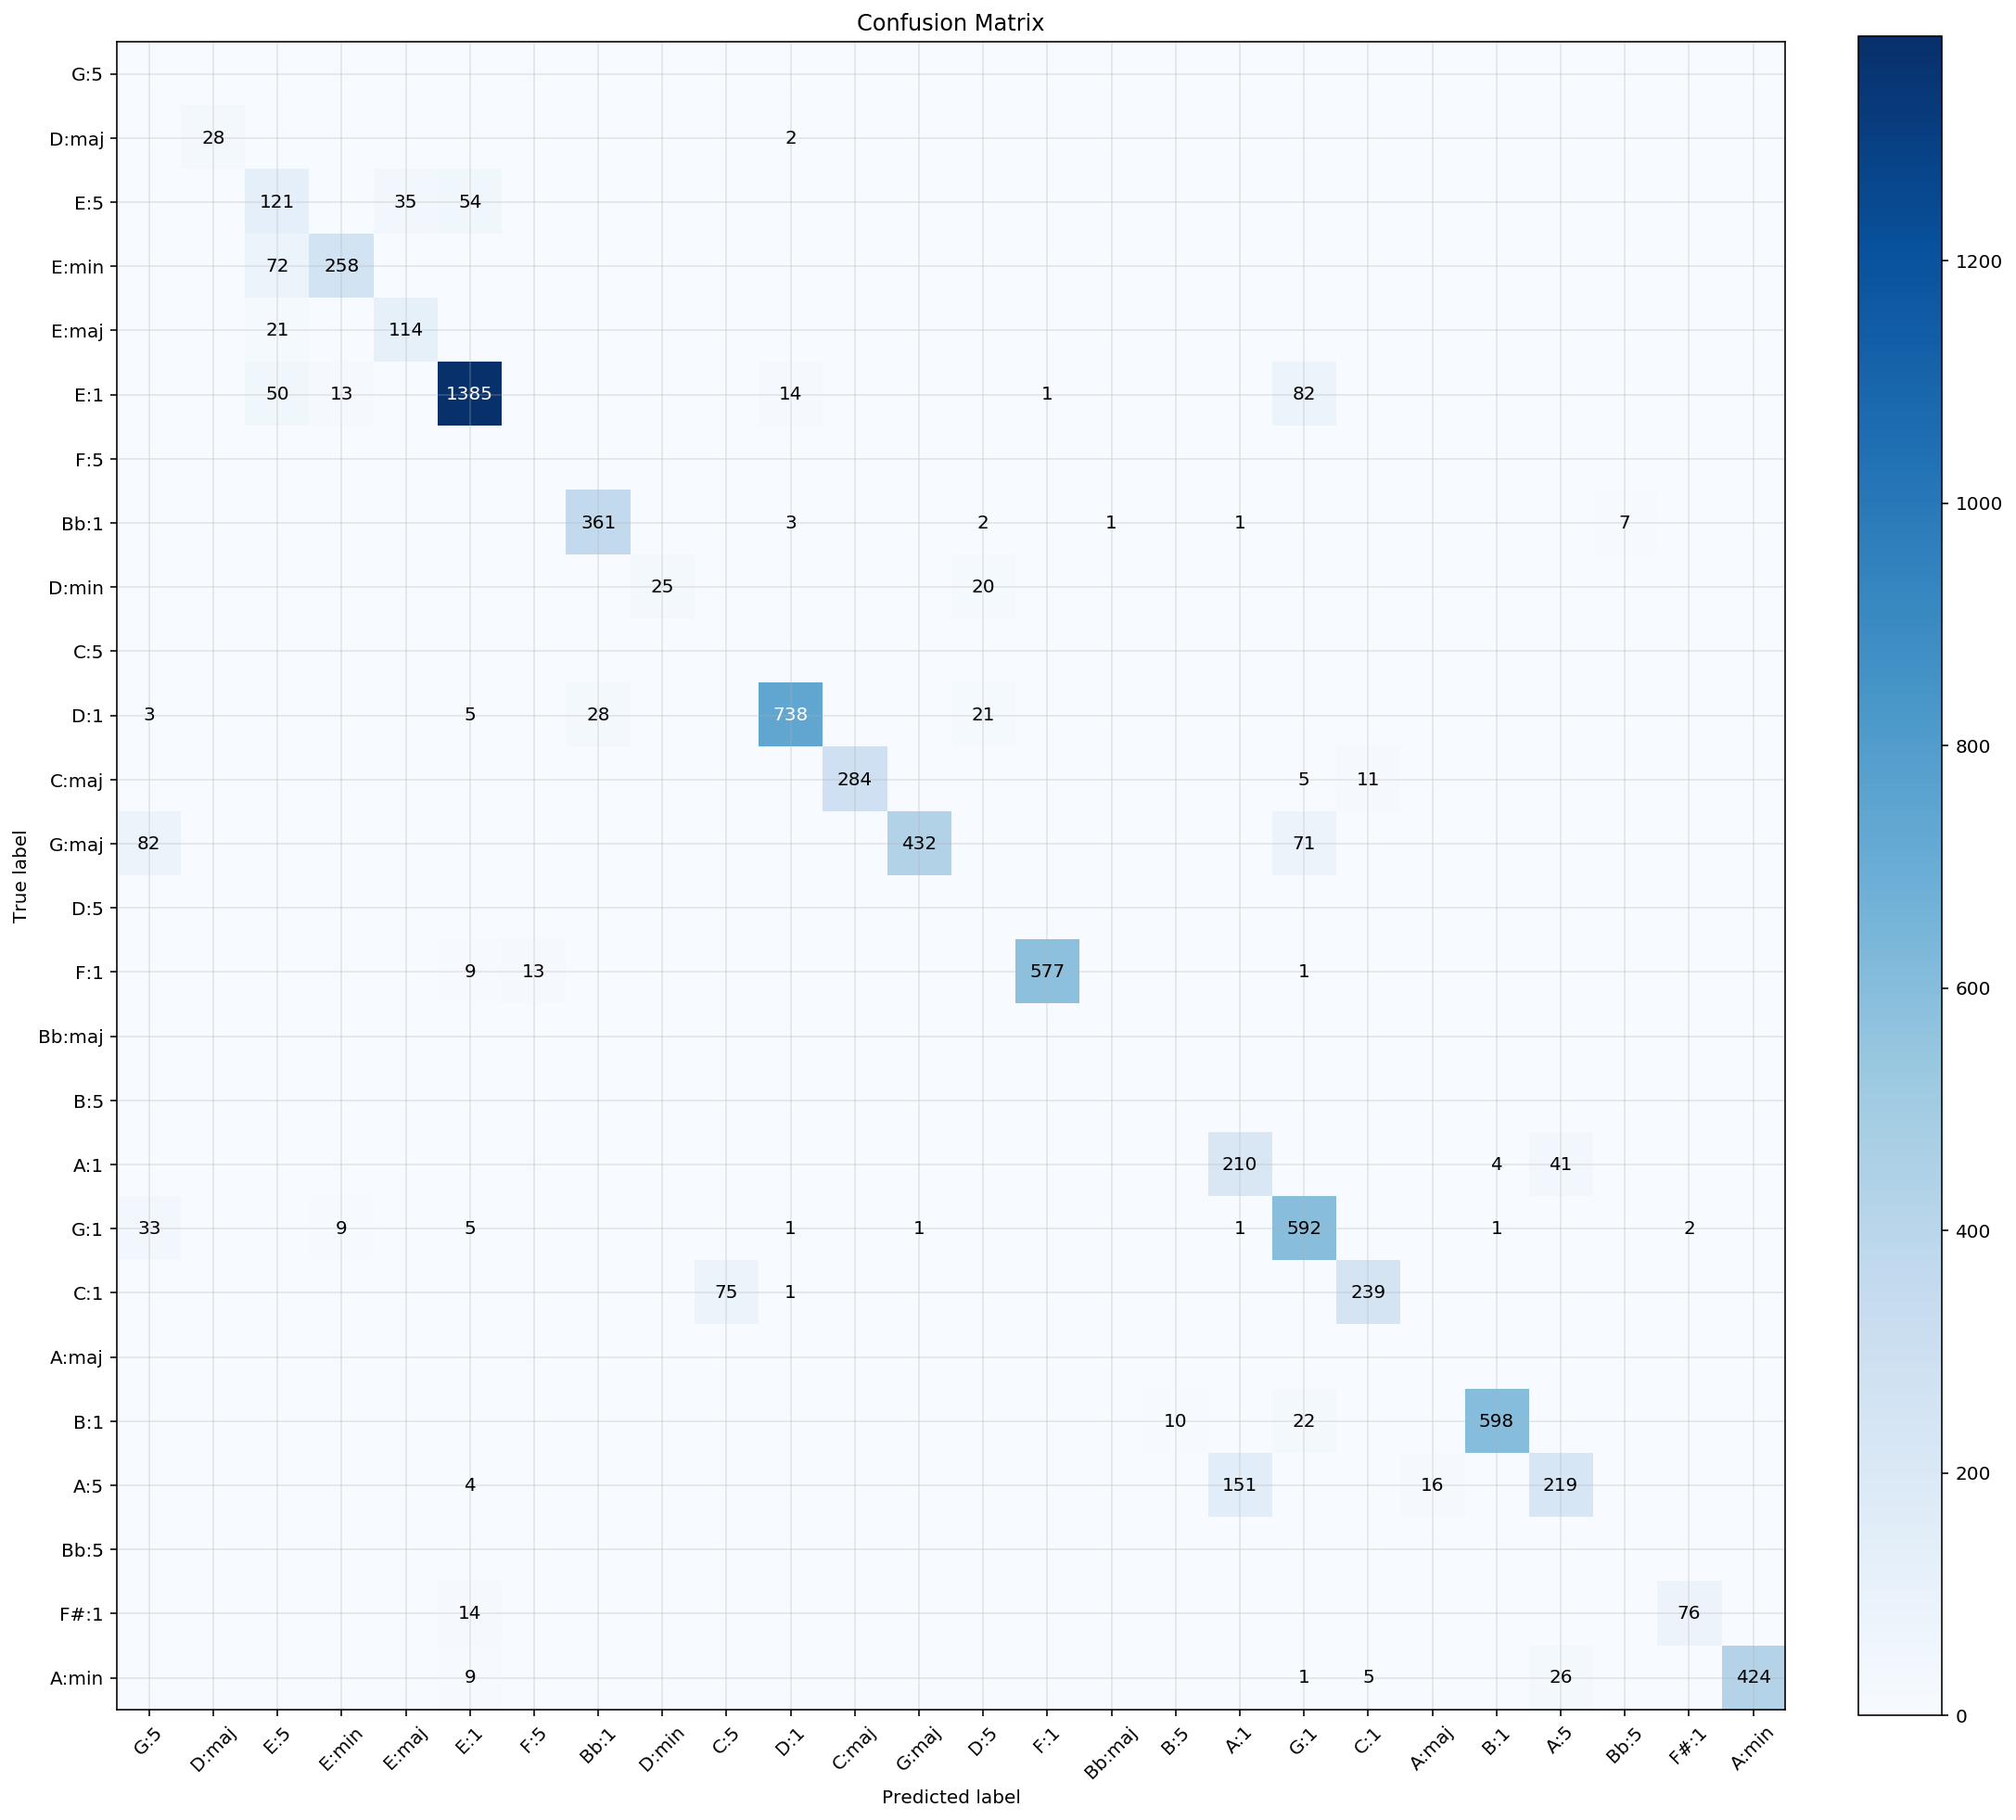

In [9]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)

OM.accuracy()

cm  =OM.conf_matrix()

#### Kind metrics

Accuracy: 0.8884


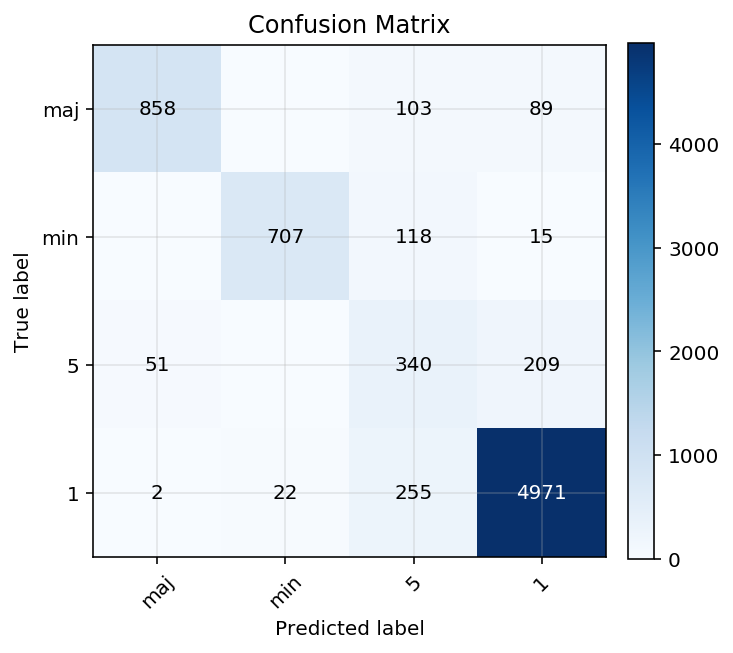

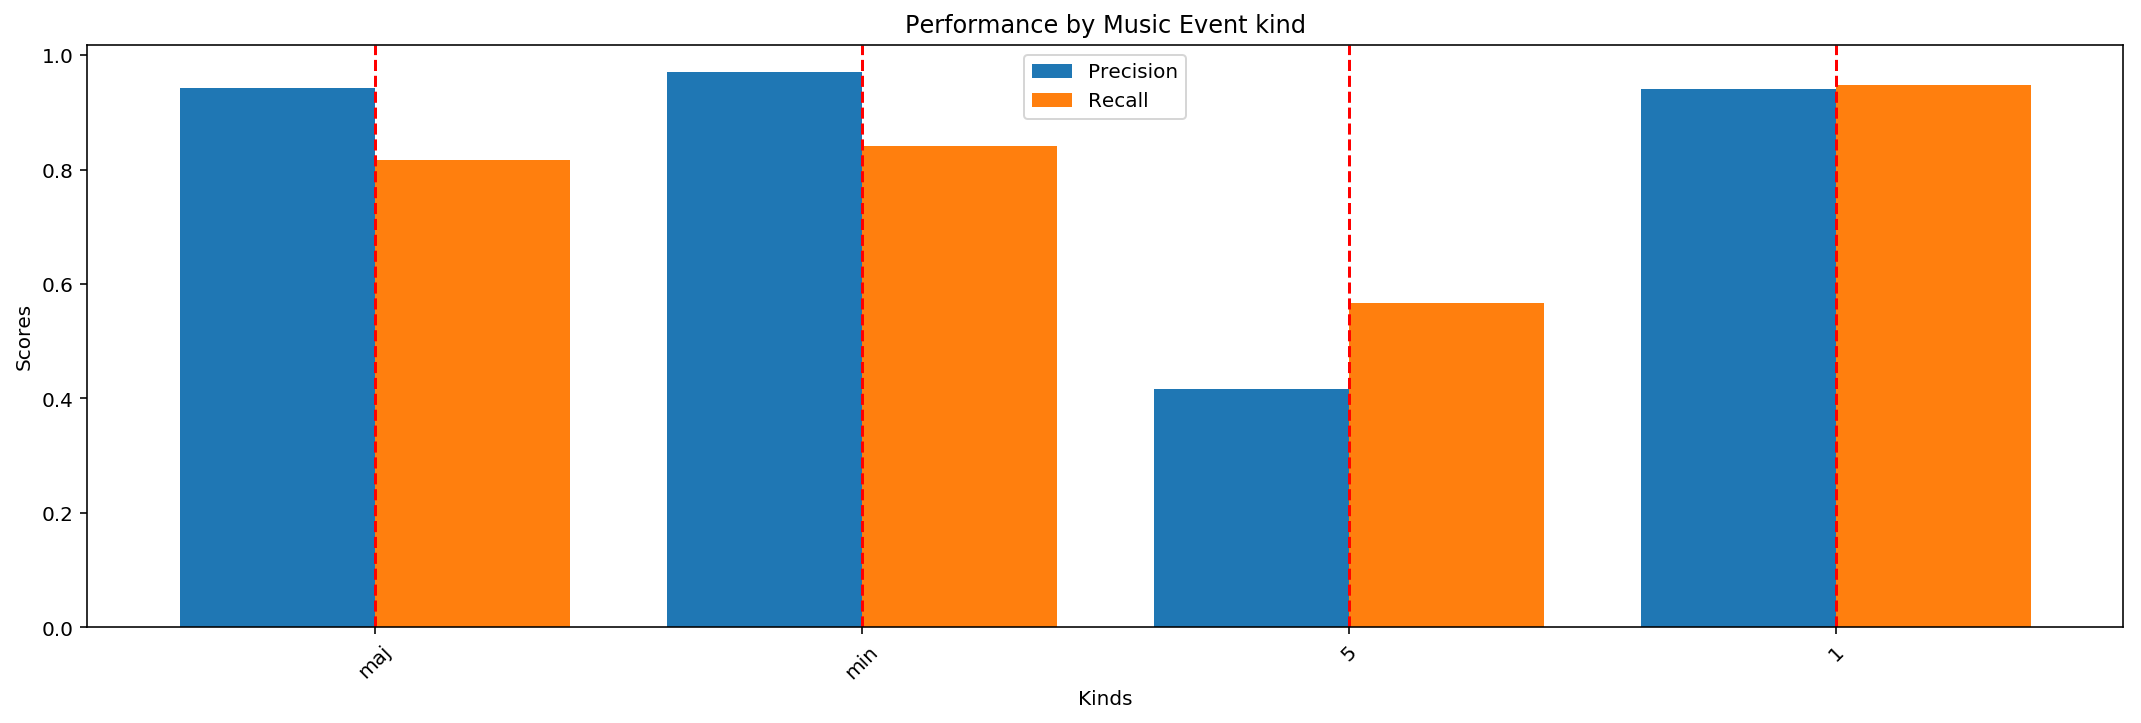

(array([0.94182217, 0.96982167, 0.41666667, 0.94076457]),
 array([0.81714286, 0.84166667, 0.56666667, 0.94685714]))

In [10]:
KM = Kind_Metrics(test_segments.kinds,pred, labels = ['maj','min','5','1'])

KM.accuracy()

cm = KM.conf_matrix()
KM.per_kind_performance()